# Cross Validation

Date May 12, 2018 

Updated December 2021

Cross Validation mechanics - a statistical method of evaluating and comparing regression and other learning algorithms by dividing data into complementary segments: at least one used to learn or train a model and another used to validate the model. 

In typical cross-validation, the training and validation sets must cross over in successive rounds such that each data point has a chance of being validated against.

Cross-validation can be applied in three contexts: performance estimation, model selection, and tuning learning model parameters - a type of monitoring technique then, of machine learning models.

Pointers and Tips
 - Train the model for each split
 - Average the scores
 - Train model on all the data
 - Establishes a lower bound score
 - Important to have a baseline

Read more --> http://leitang.net/papers/ency-cross-validation.pdf 

Nearest Neighbor --> http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms


![cv.gif](https://github.com/ginobaltazar7/66daysofdata/blob/master/CrossValidation/images/cv.gif?raw=1)



In [142]:
import numpy as np
import pandas as pd
dc_listings = pd.read_csv("https://raw.githubusercontent.com/ginobaltazar7/66daysofdata/master/CrossValidation/dc_airbnb.csv")

# Problem Definition
Which features of a listing that make an Airbnb listing more expensive?

Visualize initial data patterns, to help isolate which features.

In [143]:
dc_listings.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'accommodates', 'room_type', 'bedrooms', 'bathrooms', 'beds', 'price',
       'cleaning_fee', 'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'latitude', 'longitude', 'city', 'zipcode',
       'state'],
      dtype='object')

In [63]:
dc_listings.shape

(3723, 19)

In [64]:
dc_listings.dtypes

host_response_rate       object
host_acceptance_rate     object
host_listings_count       int64
accommodates              int64
room_type                object
bedrooms                float64
bathrooms               float64
beds                    float64
price                    object
cleaning_fee             object
security_deposit         object
minimum_nights            int64
maximum_nights            int64
number_of_reviews         int64
latitude                float64
longitude               float64
city                     object
zipcode                  object
state                    object
dtype: object

In [144]:
# some cleanup - currency and price objects to int to numeric while scrubbing chars
dc_listings['price'] = dc_listings['price'].str.replace(',','').str.replace('$','').astype('float').round()
dc_listings['cleaning_fee'] = dc_listings['cleaning_fee'].str.replace(',','').str.replace('$','').astype('float').round()
dc_listings['security_deposit'] = dc_listings['security_deposit'].str.replace(',','').str.replace('$','').astype('float').round()

<ipython-input-144-d4945c4c64de>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dc_listings['price'] = dc_listings['price'].str.replace(',','').str.replace('$','').astype('float').round()
<ipython-input-144-d4945c4c64de>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dc_listings['cleaning_fee'] = dc_listings['cleaning_fee'].str.replace(',','').str.replace('$','').astype('float').round()
<ipython-input-144-d4945c4c64de>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dc_listings['security_deposit'] = dc_listings['sec

In [145]:
dc_listings['host_response_rate'] = dc_listings['host_response_rate'].str.replace('%','').astype('float').round()
dc_listings['host_acceptance_rate'] = dc_listings['host_acceptance_rate'].str.replace('%','').astype('float').round()

In [146]:
dc_listings['price']=dc_listings['price'].astype('int')
dc_listings['cleaning_fee']=dc_listings['cleaning_fee'].fillna(0).astype('int')
dc_listings['security_deposit']=dc_listings['security_deposit'].fillna(0).astype('int')

In [147]:
dc_listings['host_response_rate']=dc_listings['host_response_rate'].fillna(0).astype('int')
dc_listings['host_acceptance_rate']=dc_listings['host_acceptance_rate'].fillna(0).astype('int')

In [92]:
dc_listings.dtypes

host_response_rate        int64
host_acceptance_rate      int64
host_listings_count       int64
accommodates              int64
room_type                object
bedrooms                float64
bathrooms               float64
beds                    float64
price                     int64
cleaning_fee              int64
security_deposit          int64
minimum_nights            int64
maximum_nights            int64
number_of_reviews         int64
latitude                float64
longitude               float64
city                     object
zipcode                  object
state                    object
dtype: object

In [148]:
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92,91,26,4,Entire home/apt,1.0,1.0,2.0,160,115,100,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90,100,1,6,Entire home/apt,3.0,3.0,3.0,350,100,0,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90,100,2,1,Private room,1.0,2.0,1.0,50,0,0,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100,0,1,2,Private room,1.0,1.0,1.0,95,0,0,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92,67,1,4,Entire home/apt,1.0,1.0,1.0,50,15,450,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [94]:
dc_listings.columns
dc_listings.shape


(3723, 19)

In [44]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline


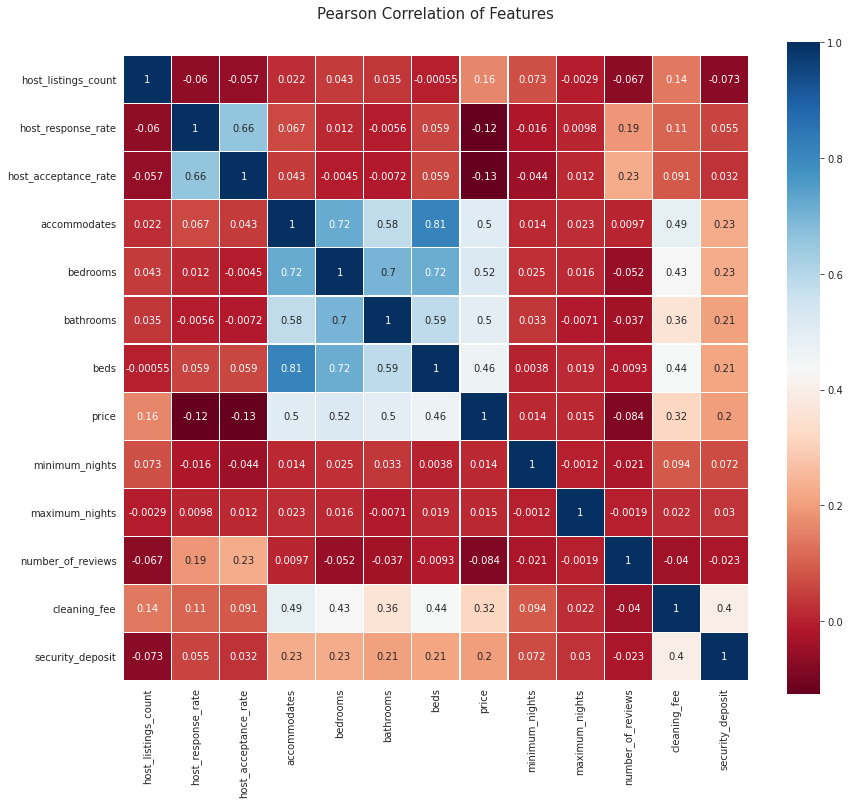

In [96]:
num_feats = ['host_listings_count','host_response_rate','host_acceptance_rate','accommodates', 'bedrooms', 'bathrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews','cleaning_fee','security_deposit']
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dc_listings[num_feats].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Distribution by Bedrooms

As the correlation chart also shows, there's definitely a relationship between bedrooms and price.

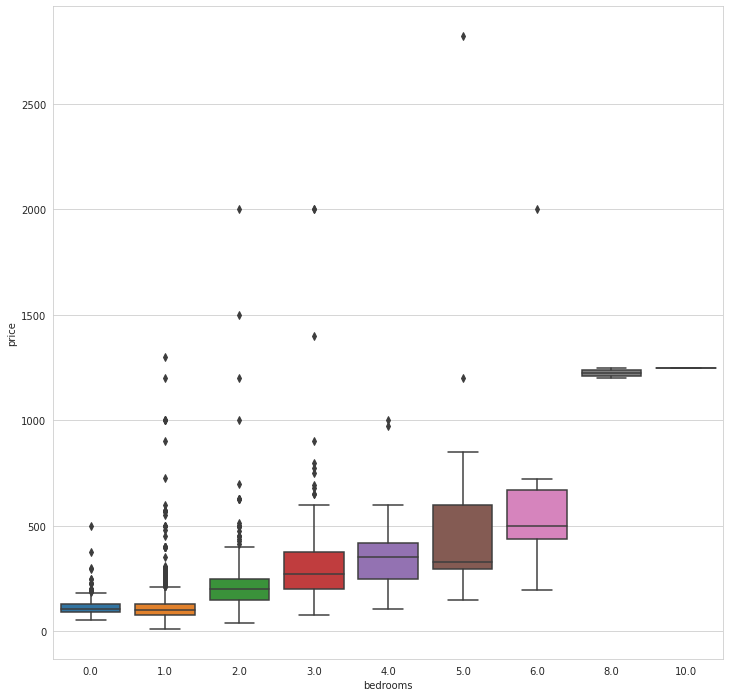

In [47]:
plt.figure(figsize=(12,12))
sns.boxplot(x='bedrooms', y='price', data=dc_listings[['bedrooms', 'price']])

# Distribution by Room Type

Entire home/apt type properties have the most bedrooms.

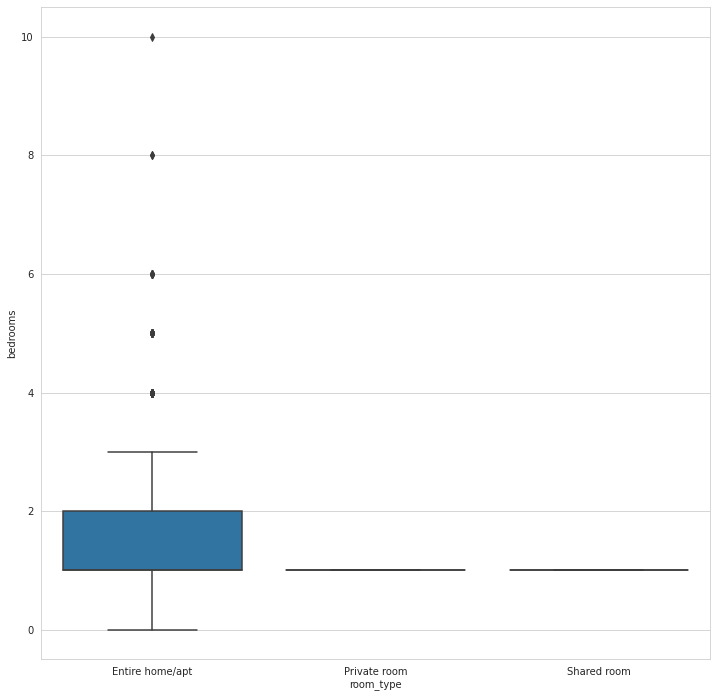

In [50]:
plt.figure(figsize=(12,12))
sns.boxplot(x='room_type', y='bedrooms', data=dc_listings[['room_type', 'bedrooms']])

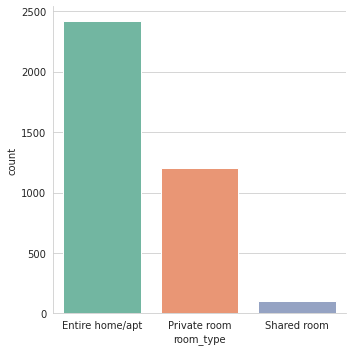

In [46]:
sns.catplot(x = "room_type", data = dc_listings, kind = "count", palette="Set2")

In [48]:
print("Number of bedrooms :", len(dc_listings["bedrooms"].unique()))
print()
print("Bedrooms|Listings")
# Number of listings of each room type
print(dc_listings["bedrooms"].value_counts())

Number of bedrooms : 10

Bedrooms|Listings
1.0     2533
2.0      511
0.0      392
3.0      190
4.0       44
5.0       21
6.0        8
8.0        2
10.0       1
Name: bedrooms, dtype: int64


# Distribution by Accommodations

As the correlation chart also shows, there's definitely also a relationship between 'accommodates' and price.

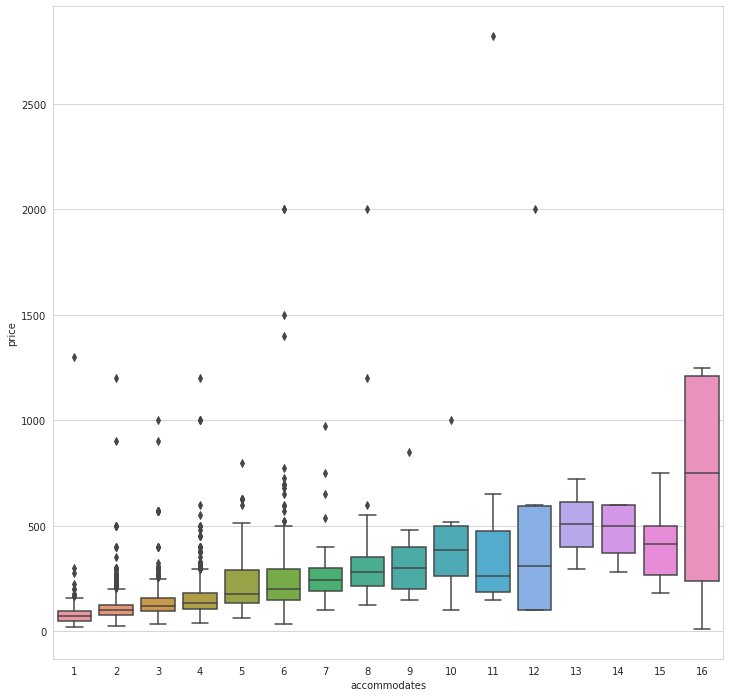

In [51]:
plt.figure(figsize=(12,12))
sns.boxplot(x='accommodates', y='price', data=dc_listings[['accommodates', 'price']])

In [52]:
print("Number of accommodates :", len(dc_listings["accommodates"].unique()))
print()
print("Accomodates|Listings")
# Number of listings of each room type
print(dc_listings["accommodates"].value_counts())

Number of accommodates : 16

Accomodates|Listings
2     1604
4      690
3      461
1      342
6      279
5      161
8       73
7       35
10      22
9       17
12      12
16       8
11       7
15       6
14       4
13       2
Name: accommodates, dtype: int64


# Attempt to Model using XGBoost


In [97]:
import time
import xgboost as xgb
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans  

In [149]:
dc_listings.dtypes

host_response_rate        int64
host_acceptance_rate      int64
host_listings_count       int64
accommodates              int64
room_type                object
bedrooms                float64
bathrooms               float64
beds                    float64
price                     int64
cleaning_fee              int64
security_deposit          int64
minimum_nights            int64
maximum_nights            int64
number_of_reviews         int64
latitude                float64
longitude               float64
city                     object
zipcode                  object
state                    object
dtype: object

In [150]:
num_feats = ['room_type','host_listings_count','host_response_rate','host_acceptance_rate','accommodates', 'bedrooms', 'bathrooms', 'beds','price', 'minimum_nights', 'maximum_nights', 'number_of_reviews','cleaning_fee','security_deposit']

In [151]:
dc_listings = dc_listings[num_feats].copy()

In [152]:
dm_listings = pd.get_dummies(dc_listings, columns = ['room_type'])
dm_listings

,host_listings_count,host_response_rate,host_acceptance_rate,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,cleaning_fee,security_deposit,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,26,92,91,4,1.0,1.0,2.0,160,1,1125,0,115,100,1,0,0
1,1,90,100,6,3.0,3.0,3.0,350,2,30,65,100,0,1,0,0
2,2,90,100,1,1.0,2.0,1.0,50,2,1125,1,0,0,0,1,0
3,1,100,0,2,1.0,1.0,1.0,95,1,1125,0,0,0,0,1,0
4,1,92,67,4,1.0,1.0,1.0,50,7,1125,0,15,450,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,1,100,60,4,1.0,1.0,2.0,135,3,60,19,45,400,1,0,0
3719,1,100,50,2,1.0,2.0,1.0,79,3,365,36,0,0,0,1,0
3720,2,100,100,6,2.0,1.0,3.0,275,2,2147483647,12,100,500,1,0,0
3721,1,88,100,2,1.0,1.0,1.0,179,2,21,48,25,0,1,0,0


In [166]:

X = dm_listings.loc[:, dm_listings.columns != 'price'] # predictors excluding price
y = dc_listings.price.values                           # outcome variable price
print(dc_listings.shape, X.shape, y.shape)

(3723, 14) (3723, 15) (3723,)


In [167]:
X

,host_listings_count,host_response_rate,host_acceptance_rate,accommodates,bedrooms,bathrooms,beds,minimum_nights,maximum_nights,number_of_reviews,cleaning_fee,security_deposit,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,26,92,91,4,1.0,1.0,2.0,1,1125,0,115,100,1,0,0
1,1,90,100,6,3.0,3.0,3.0,2,30,65,100,0,1,0,0
2,2,90,100,1,1.0,2.0,1.0,2,1125,1,0,0,0,1,0
3,1,100,0,2,1.0,1.0,1.0,1,1125,0,0,0,0,1,0
4,1,92,67,4,1.0,1.0,1.0,7,1125,0,15,450,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,1,100,60,4,1.0,1.0,2.0,3,60,19,45,400,1,0,0
3719,1,100,50,2,1.0,2.0,1.0,3,365,36,0,0,0,1,0
3720,2,100,100,6,2.0,1.0,3.0,2,2147483647,12,100,500,1,0,0
3721,1,88,100,2,1.0,1.0,1.0,2,21,48,25,0,1,0,0


In [168]:
y

array([160, 350,  50, ..., 275, 179, 110])

In [169]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [170]:
# Train a XGBoost classifier
start_time = time.time()
print("Train model")

params = {'colsample_bylevel': 1.0,
          'colsample_bytree': 0.3,
          'gamma' : 1.0,
          'eta' : 0.1,
          'max_depth' : 3,
          'min_child_weight' : 0.5,
          'alpha': 10.0,
          'lambda': 10.0,
          'subsample': 0.9,
          'objective' : 'reg:linear',
          'eval_metric': 'logloss',
          'seed': 2021}

xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
watchlist = [(xgb_train, 'train'), (xgb_test, 'eval')]
 
start_time = time.time()
xgb_clf = xgb.train(params, 
                    xgb_train, 
                    10000, 
                    watchlist, 
                    early_stopping_rounds=50, 
                    verbose_eval=10)

print('Execution time: {:0.2f}m'.format((time.time()-start_time)/60))

Train model
[16:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-logloss:-5474.05	eval-logloss:-5397.04
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 50 rounds.
[10]	train-logloss:-5474.05	eval-logloss:-5397.04
[20]	train-logloss:-5474.05	eval-logloss:-5397.04
[30]	train-logloss:-5474.05	eval-logloss:-5397.04
[40]	train-logloss:-5474.05	eval-logloss:-5397.04
[50]	train-logloss:-5474.05	eval-logloss:-5397.04
Stopping. Best iteration:
[0]	train-logloss:-5474.05	eval-logloss:-5397.04

Execution time: 0.00m


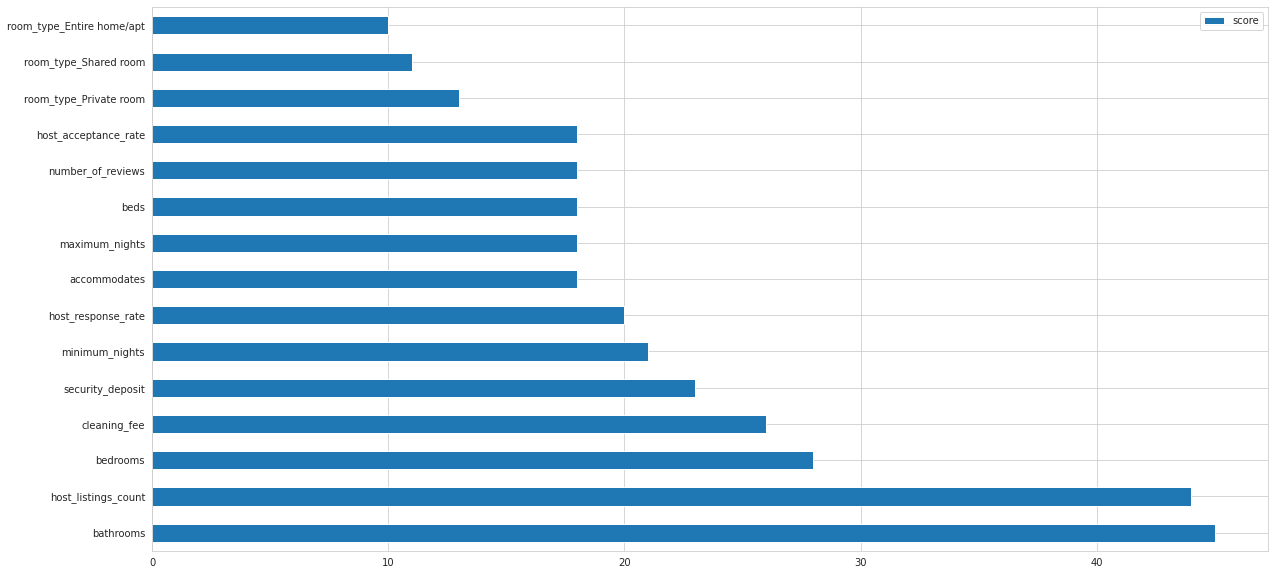

In [172]:
feature_important = xgb_clf.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) 

# Predictors 
Bathroom, bedrooms, host_listings_count are top three predictors of price.

Further work is needed to evaluate against other models like CatBoost, Regresssion, etc.

# Holdout validation or 2-Fold involves

- splitting the full dataset into 2 partitions or segments: a training set and a test set
- training the model on the training set,
- using the trained model to predict labels on the test set,
- computing an error metric to understand the model's effectiveness,
- switch the training and test sets and repeat,
- average the errors.

In [120]:
#stripped_commas = dc_listings['price'].str.replace(',', '')
#stripped_dollars = stripped_commas.str.replace('$', '')
#dc_listings['price'] = stripped_dollars.astype('float')
dc_listings['bedrooms']=dc_listings['bedrooms'].fillna(0).astype('int')

np.random.seed(1)

#shuffle
s_index = np.random.permutation(dc_listings.shape[0])
dc_listings = dc_listings.loc[s_index]

split_one = dc_listings.iloc[0:1862]
split_two = dc_listings.iloc[1862:]

In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

#cross validation involves iterating while switching train and test splits
train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

# for documentation on algorithm = auto parameter of KNeighborsRegressor
# see http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms
# first iteration
train_columns = ['bedrooms']
knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto', metric='euclidean')
knn.fit(train_one[train_columns], train_one['price'])
prediction1 = knn.predict(test_one[train_columns])

# score performance using MSE and RMSE
# RMSE is aka residual sum of squares
y_true = test_one['price'].values
y_pred = prediction1
iteration_one_mse = mean_squared_error(y_true,y_pred)
iteration_one_rmse = iteration_one_mse**0.5    

# second iteration
train_columns = ['bedrooms']
knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto', metric='euclidean')
knn.fit(train_two[train_columns], train_two['price'])
prediction2 = knn.predict(test_two[train_columns])

# score performance using MSE and RMSE
# RMSE is aka residual sum of squares
y_true = test_two['price'].values
y_pred = prediction2
iteration_two_mse = mean_squared_error(y_true,y_pred)
iteration_two_rmse = iteration_two_mse**0.5   

avg_rmse = np.mean([iteration_one_rmse,iteration_two_rmse])
print(avg_rmse)

157.1232049209205


# K-fold cross validation 

K-fold cross validation, on the other hand, takes advantage of a larger proportion of the data during training while still rotating through different segments or subsets of the data to avoid the issues of train/test validation.

The algorithm for k-fold cross validation involves:

- splitting the full dataset into k equal length partitions.
- selecting k-1 partitions as the training set and
- selecting the remaining partition as the test set
- training the model on the training set.
- using the trained model to predict labels on the test fold.
- computing the test fold's error metric.
- repeating all of the above steps k-1 times, until each partition has been used as the test set for an iteration.
- calculating the mean of the k error values.

In [122]:
# Generally 5 folds are used
dc_listings.loc[dc_listings.index[0:745], "fold"] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#cross validation involves iterating while switching train and test splits
train_split = dc_listings[dc_listings['fold'].isin([2,3,4,5])]
test_split = dc_listings[dc_listings['fold'].isin([1])]

# first iteration, default neighbors = 5 and is optional
# train on the hypothesis that 'accommodates' influences the price 
train_columns = ['bedrooms']
knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto', metric='euclidean')
knn.fit(train_split[train_columns], train_split['price'])
prediction = knn.predict(test_split[train_columns])

# score performance using MSE and RMSE
# RMSE is aka residual sum of squares
y_true = test_split['price'].values
y_pred = prediction
iteration_one_mse = mean_squared_error(y_true,y_pred)
iteration_one_rmse = iteration_one_mse**0.5  
print(iteration_one_rmse)

94.2769411764292


In [124]:
# Try wrapping the training model in a function
# Use np.mean to calculate the mean.
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

fold_ids = [1,2,3,4,5]

def train_and_validate(df,folds):
    
    thermses = []
    for f in folds:
        train_split = df[df['fold'] != f]
        test_split = df[df['fold'] == f]
        #train the split
        train_columns = ['bedrooms']
        knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto', metric='euclidean')
        knn.fit(train_split[train_columns], train_split['price'])
    
        prediction = knn.predict(test_split[train_columns])

        # performance using MSE and RMSE
        # RMSE is aka residual sum of squares
        y_true = test_split['price'].values
        y_pred = prediction
        iteration_one_mse = mean_squared_error(y_true,y_pred)
        iteration_one_rmse = iteration_one_mse**0.5
        thermses.append(iteration_one_rmse)
    return(thermses)

rmses = train_and_validate (dc_listings,fold_ids)
avg_rmse = np.mean(rmses)
print(rmses)
print(avg_rmse)
print(np.std(rmses))

[94.2769411764292, 124.40995255726935, 158.89438011540264, 103.58846850133278, 135.81936602679113]
123.39782167544502
23.046739414895104


# Using KFold and Cross_Val_Score

The function written as is, however, has many limitations. If we want to now change the number of folds we want to use, we need to make the function more general so it can also handle randomizing the ordering of the rows in the dataframe and splitting into folds.

In machine learning, we're interested in building a good model and accurately understanding how well it will perform. To build a better k-nearest neighbors model, we can change the features it uses or tweak the number of neighbors (a hyperparameter). To accurately understand a model's performance, we can perform k-fold cross validation and select the proper number of folds. The scikit-learn library makes it easy for us to quickly experiment with these different knobs when it comes to building a better model. 

The KFold class returns an iterator object which we use in conjunction with the cross_val_score() function, also from sklearn.model_selection. Together, these 2 functions allow us to compactly train and test using k-fold cross validation

In [125]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


knn = KNeighborsRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=1)
X1 = dc_listings[['bedrooms']]
y1 = dc_listings[['price']]
mses = cross_val_score(estimator=knn, X=X1, y=y1, cv=kf, scoring='neg_mean_squared_error')
mses = np.abs(mses)
avg_rmse = np.mean(np.sqrt(mses))
print(avg_rmse)

# compare to above rmse - in a way we are building some type of baseline score for the model

120.03461809829494


# Choosing the right k value 

Choosing the right k for k-fold cross validation is more of an art and less of a science. A k value of 2 is really just holdout validation. On the other end, setting k equal to n (the number of observations in the data set) is known as leave-one-out cross validation, or LOOCV for short. Through lots of trial and error, data scientists have converged on 10 as the standard k value.

In [126]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, dc_listings[["bedrooms"]], dc_listings["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  122.15353293638361 std RMSE:  2.0295161693966555
5 folds:  avg RMSE:  120.03461809829494 std RMSE:  13.439737842295807
7 folds:  avg RMSE:  121.00867900283158 std RMSE:  15.918159121165813
9 folds:  avg RMSE:  122.8033911506138 std RMSE:  19.75231504752228
10 folds:  avg RMSE:  121.3863052084433 std RMSE:  21.529620397148705
11 folds:  avg RMSE:  121.59824182607657 std RMSE:  23.32274739299588
13 folds:  avg RMSE:  117.10960661353761 std RMSE:  26.657562475339063
15 folds:  avg RMSE:  118.7671513891173 std RMSE:  28.892064183783816
17 folds:  avg RMSE:  116.35279964396892 std RMSE:  35.08290650353693
19 folds:  avg RMSE:  116.80378102782183 std RMSE:  35.820675211912
21 folds:  avg RMSE:  120.15826679629274 std RMSE:  36.31245655118032
23 folds:  avg RMSE:  117.12892494822523 std RMSE:  37.84042217306169


# Interpreting results

From results above - 5 folds appears to be the ideal train/test split. 

Further work - split the XGBoost train/test as above from 2 to 5. Then rerun the model and see the impact to the predictors.

# Bias and Variance

Parting thoughts: a lower RMSE does NOT always mean that a model is more accurate. A model has two other sources of error, bias and variance.

Bias describes error that results in bad assumptions about the learning algorithm. For example, assuming that only one feature, like a car's weight, relates to a car's fuel efficiency will lead you to fit a simple, univariate regression model that will result in high bias. The error rate will be high since a car's fuel efficiency is affected by many other factors besides just its weight.

Variance describes error that occurs because of the variability of a model's predicted values. If we were given a dataset with 1000 features on each car and used every single feature to train an incredibly complicated multivariate regression model, we will have low bias but high variance. In an ideal world, we want low bias and low variance but in reality, there's always a tradeoff.

The standard deviation of the RMSE values can be a proxy for a model's variance while the average RMSE is a proxy for a model's bias. Bias and variance are the 2 observable sources of error in a model that we can indirectly control.

References:

https://stats.stackexchange.com/questions/63968/optimization-the-root-of-all-evil-in-statistics

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://mohamedirfansh.github.io/Airbnb-Data-Science-Project/
